In [1]:
import experiment_framework as ef
import fast_model_improved as fmi
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
# Load the graph from the file
save_path = '/Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/wikivote.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from /Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/wikivote.gpickle


In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 2254
Number of deinfluenced nodes: 0
Number of susceptible nodes: 4861
influencer {2433, 3074, 7428, 1541, 2950, 3462, 8070, 3593, 4104, 5390, 913, 6930, 8212, 25, 6427, 4636, 3613, 6044, 1950, 5275, 3746, 932, 938, 8108, 8111, 4661, 3510, 1847, 4789, 1345, 3397, 2640, 6226, 2517, 2269, 6113, 1250, 2405, 6504, 1128, 5227, 3692, 7021, 5997, 5739, 1137, 6129, 7928, 8062, 1663}


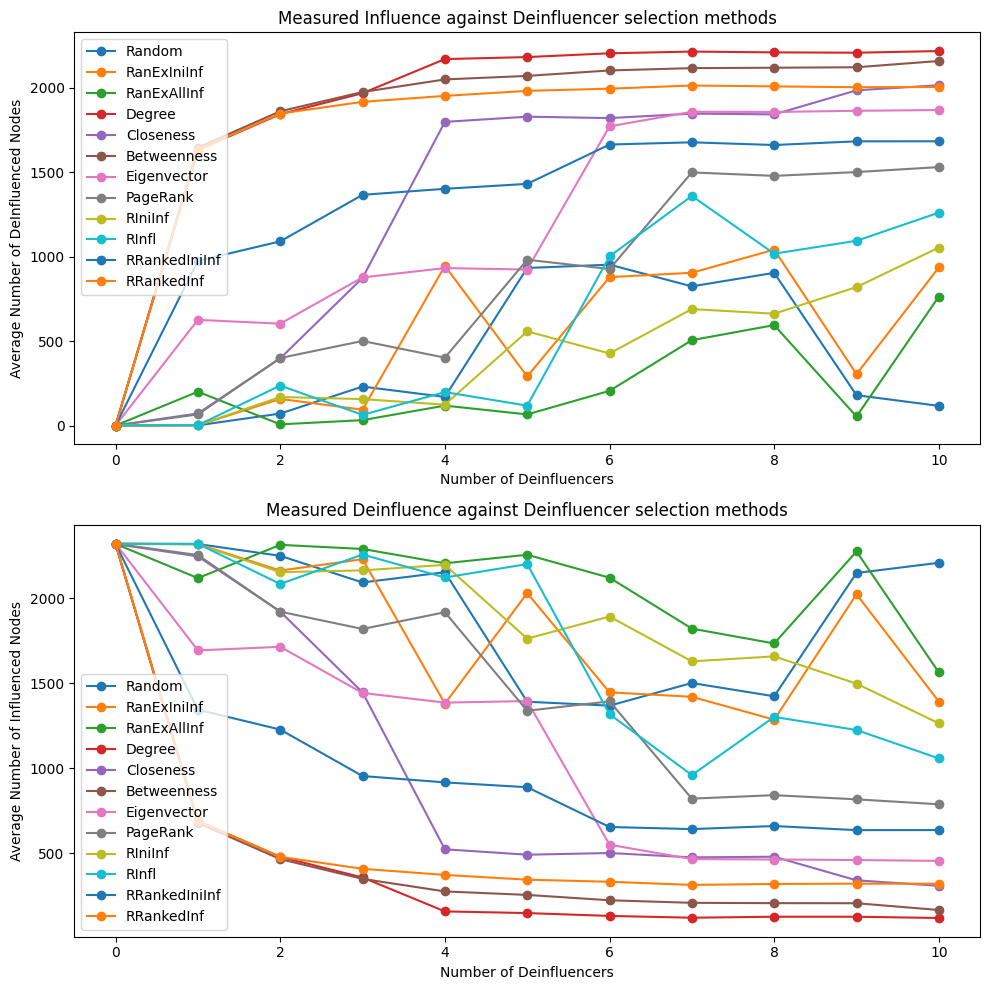

In [4]:
# Run simulation for different values of k
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9,10]  # Different values of k to test
deinfluencers_list = ef.select_deinfluencers(k_deinfluencers_ls, model_fixed_influencers)
results = ef.average_results(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=2)

# Plotting results
fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].set_title('Measured Influence against Deinfluencer selection methods')
axs[1].set_title('Measured Deinfluence against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting

for method in methods:
    influenced_nodes = [results[k][method][0] for k in k_values]
    total_steps = [results[k][method][1] for k in k_values]

    axs[0].plot(k_values, influenced_nodes, label=method, marker='o')
    axs[1].plot(k_values, total_steps, label=method, marker='o')

axs[0].legend()
axs[0].set_xlabel('Number of Deinfluencers')
axs[0].set_ylabel('Average Number of DeInfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Number of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

plt.tight_layout()
plt.show()
